In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'/Users/meghanmcgrath/Documents/Data Sets'

In [3]:
df_unscaled = pd.read_csv(os.path.join(path, 'Dataset_unscaled_14.csv'))

In [4]:
df_unscaled.head()

,Unnamed: 0,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
df_unscaled.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_unscaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [7]:
df_pleasant = pd.read_csv(os.path.join(path, '2Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [21]:
df_pleasant.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_pleasant.drop('DATE', axis=1, inplace=True)

In [9]:
# Create a subset due to memory issue
# df_unscaled_2 = df_unscaled.loc[0:2000]
# df_pleasant_2 = df_pleasant.loc[0:2000]

In [10]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_unscaled
y = df_pleasant

In [11]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [12]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


[Text(0.36777723429054826, 0.9807692307692307, 'x[49] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06349951330989874, 0.9423076923076923, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.01794461287794415, 0.9038461538461539, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.007693586808563297, 0.8653846153846154, 'x[78] <= 17.85\ngini = 0.00

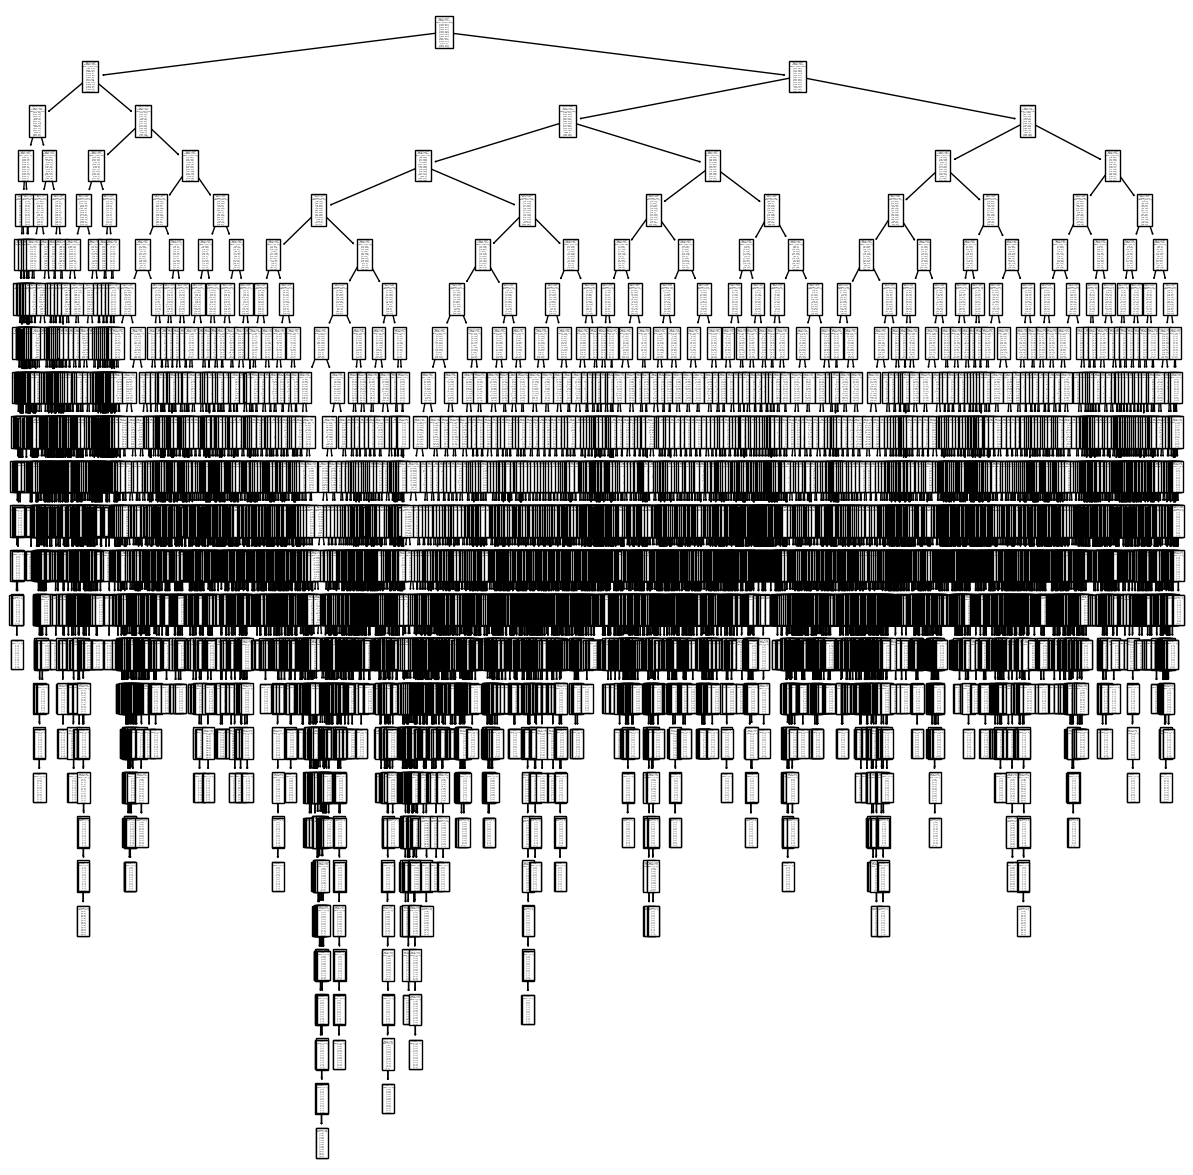

In [14]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [15]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())
multilabel_confusion_matrix(y_train, y_pred_train)

Train accuracy score:  0.6021960551584956


array([[[12948,     0],
        [    0,  4264]],

       [[11182,     0],
        [    0,  6030]],

       [[11619,     0],
        [    0,  5593]],

       [[13854,     0],
        [    0,  3358]],

       [[13509,     0],
        [    0,  3703]],

       [[13421,     0],
        [    0,  3791]],

       [[14361,     0],
        [    0,  2851]],

       [[12379,     0],
        [    0,  4833]],

       [[13622,     0],
        [    0,  3590]],

       [[ 9535,     0],
        [    0,  7677]],

       [[13637,     0],
        [    0,  3575]],

       [[14492,     0],
        [    0,  2720]],

       [[17212,     0],
        [    0,     0]],

       [[14290,     0],
        [    0,  2922]],

       [[16314,     0],
        [    0,   898]]])

Decision tree needs to be pruned because the train accuracy score is only 0.5.

In [16]:
locations = list({x.split("_")[0] for x in df_unscaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

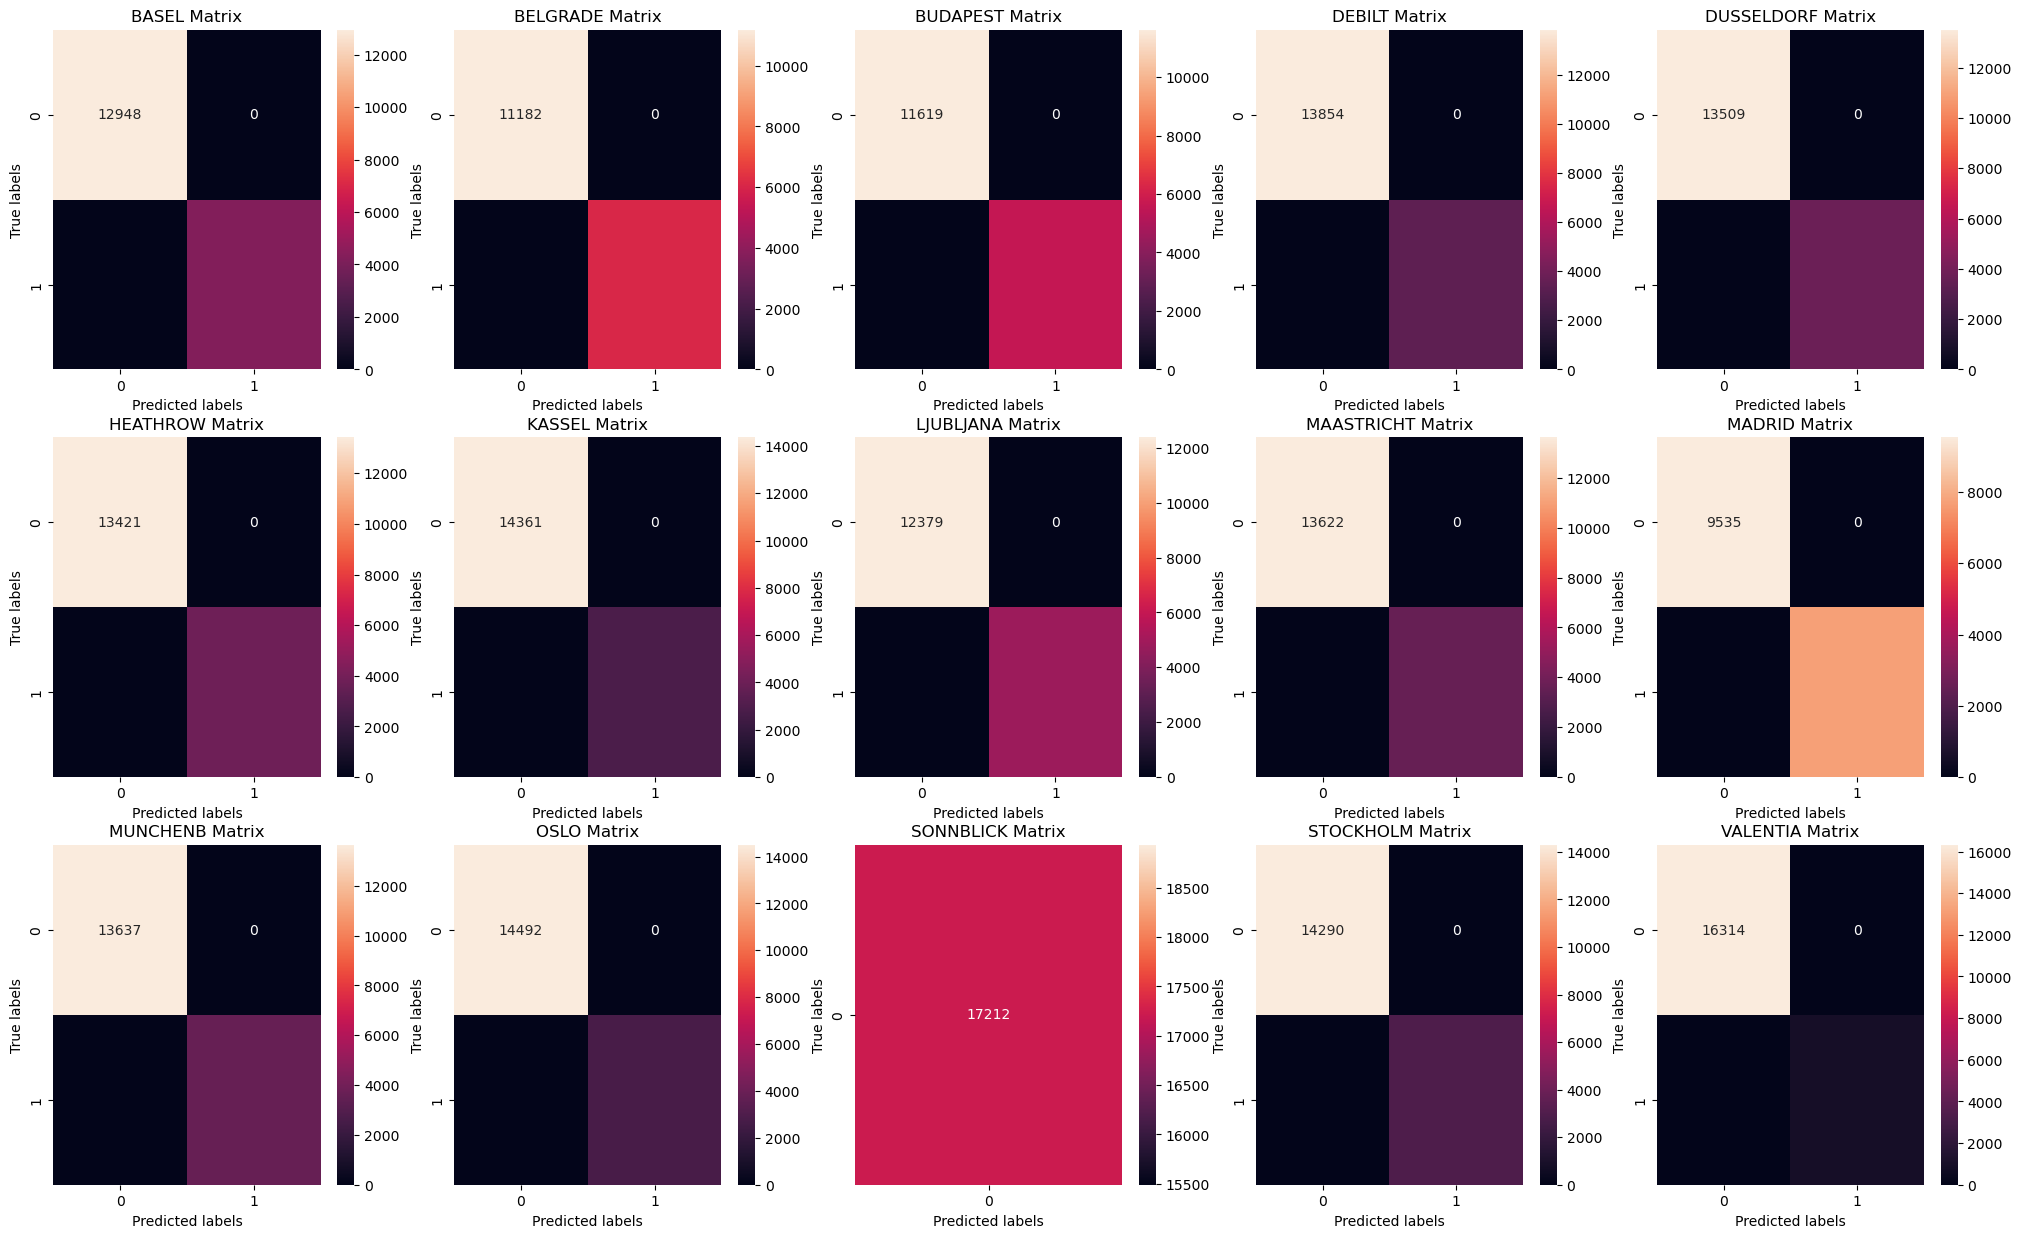

In [17]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [18]:
#What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6317532241199024


array([[[4163,  175],
        [ 168, 1232]],

       [[3654,  122],
        [ 114, 1848]],

       [[3746,  154],
        [ 147, 1691]],

       [[4401,  236],
        [ 197,  904]],

       [[4475,   32],
        [  35, 1196]],

       [[4265,  305],
        [ 244,  924]],

       [[4664,  151],
        [ 133,  790]],

       [[4133,   62],
        [  37, 1506]],

       [[4329,  233],
        [ 188,  988]],

       [[2997,  171],
        [ 149, 2421]],

       [[4384,  162],
        [ 156, 1036]],

       [[4724,  155],
        [ 139,  720]],

       [[5738,    0],
        [   0,    0]],

       [[4510,  256],
        [ 259,  713]],

       [[5268,  194],
        [ 183,   93]]])

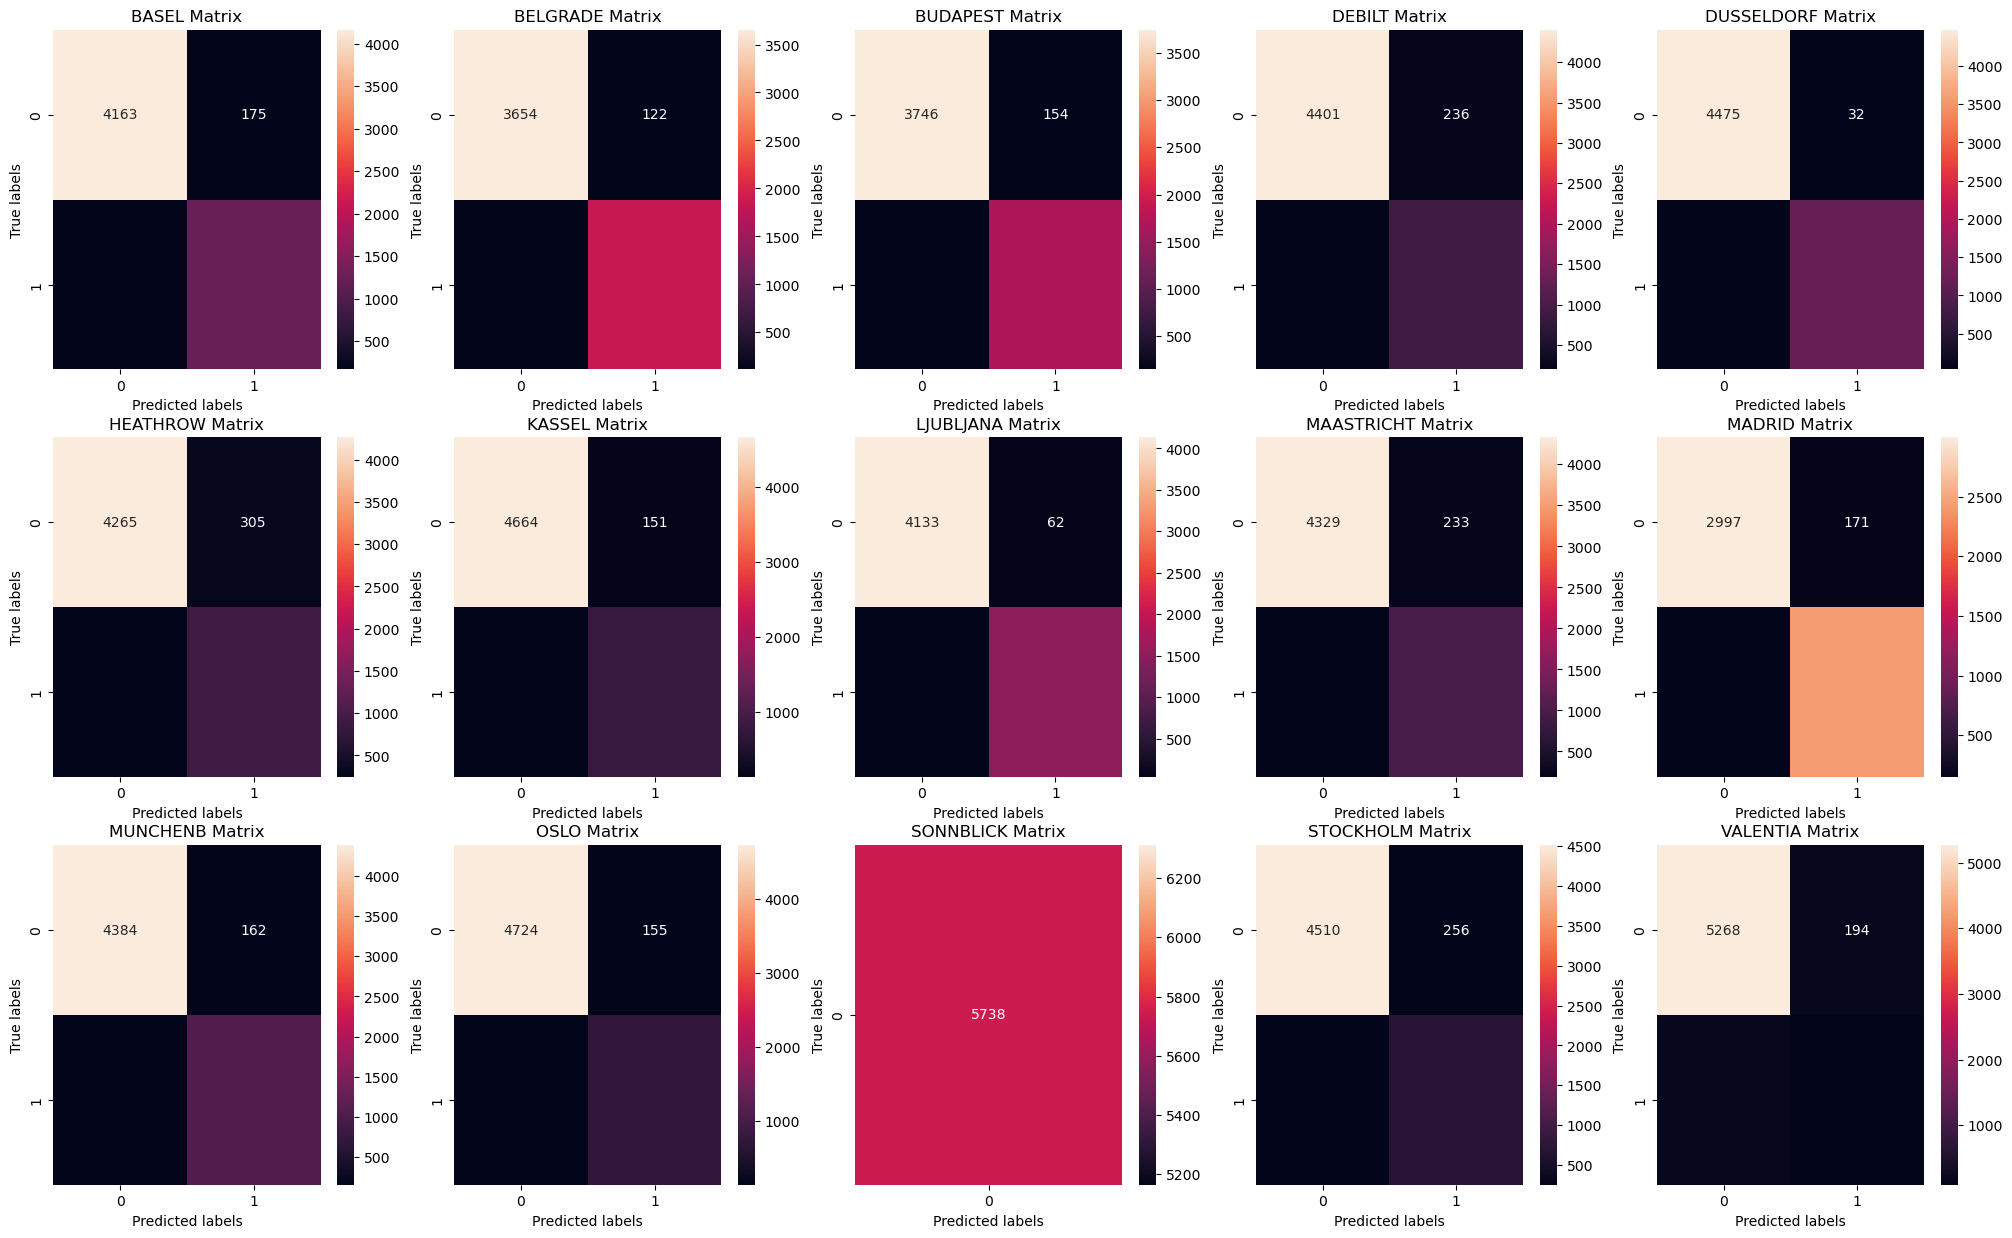

In [19]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [22]:
# Create a subset for one station - Basel?
df_unscaled_3 = df_unscaled.iloc[:, :10]
df_pleasant_3 = df_pleasant.iloc[:, :1]

In [23]:
df_unscaled_3.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7


In [24]:
df_pleasant_3.head()

,BASEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [25]:
#Create an 'X' matrix 
X_2 = df_unscaled_3
y_2 = df_pleasant_3

In [26]:
print(X_2.shape)
print(y_2.shape)

(22950, 10)
(22950, 1)


In [27]:
#Split data into training and testing sets.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

In [28]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(17212, 10)
(5738, 10)
(17212, 1)
(5738, 1)


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train_2)

#Scaling the X data
X_train_sc = scaler.transform(X_train_2)
X_test_sc = scaler.transform(X_test_2)

print(X_train_sc[:10])

[[-1.41107749e+00 -3.09502744e-02 -6.16603154e-01 -7.46130745e-01
   1.18161475e+00 -3.21906635e-01 -1.78395780e-01  5.30475346e-01
   1.35262702e+00  1.11276341e+00]
 [ 1.08186228e+00 -5.87893424e-01  5.57788069e-01 -2.14102475e-01
  -8.27239612e-01 -2.62135797e-01 -1.78395780e-01 -1.06970594e+00
  -1.65254457e+00 -1.45514929e+00]
 [ 6.66372321e-01 -8.66365000e-01  7.38463642e-01 -1.26295821e+00
  -1.00986274e+00 -3.01983022e-01  8.21457090e-01 -9.30559741e-01
  -1.65254457e+00 -1.88313474e+00]
 [-1.41107749e+00 -3.09502744e-02 -1.64914222e-01  4.09130640e-01
  -5.90903804e-01 -4.41448309e-01 -1.78395780e-01 -2.58019780e-01
  -1.59839734e+00 -1.54686045e+00]
 [ 6.66372321e-01  3.17147284e+00 -6.16603154e-01 -6.85327514e-01
  -8.27239612e-01  1.90953796e+00 -1.78395780e-01 -9.53750774e-01
  -5.83136663e-01 -6.90889554e-01]
 [ 6.66372321e-01 -1.00560079e+00 -1.06829209e+00  1.83800656e+00
   1.57908861e+00 -4.41448309e-01 -1.78395780e-01  1.27258841e+00
   1.06835403e+00  6.54207574e-01

In [31]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train_2.index, columns=X_train_2.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test_2.index, columns=X_test_2.columns)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

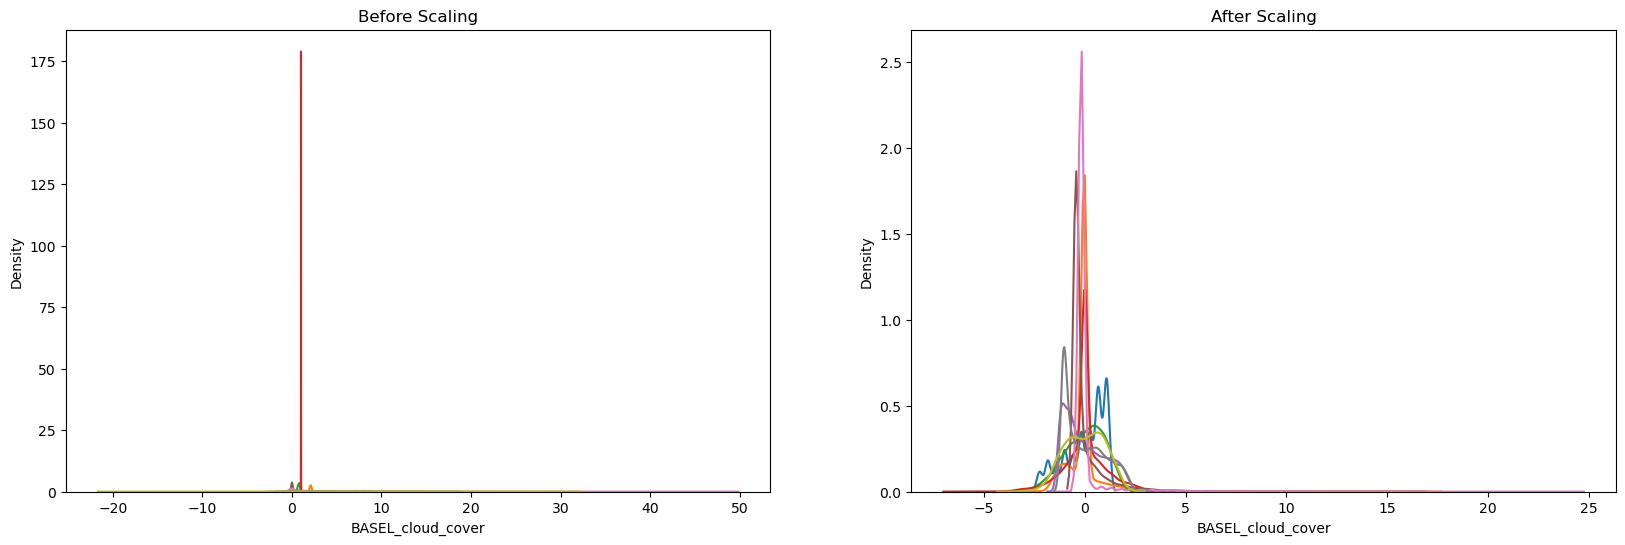

In [32]:
#Show scaling differences

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train_2['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_wind_speed'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_humidity'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_pressure'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_global_radiation'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_precipitation'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_snow_depth'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_sunshine'], ax=ax1)
sns.kdeplot(X_train_2['BASEL_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_wind_speed'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_humidity'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_pressure'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_global_radiation'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_precipitation'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_snow_depth'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_sunshine'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)

plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
#Create an 'X' matrix 
X_3 = df_unscaled
y_3 = df_pleasant

In [35]:
#Split data into training and testing sets.
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42)

In [37]:
print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [38]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_3, y_train_3)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [40]:
y_pred_3 = mlp.predict(X_train_3)
print(accuracy_score(y_pred_3, y_train_3))
y_pred_test_3 = mlp.predict(X_test_3)
print(accuracy_score(y_pred_test_3, y_test_3))

0.49959330699511967
0.5020913210177762


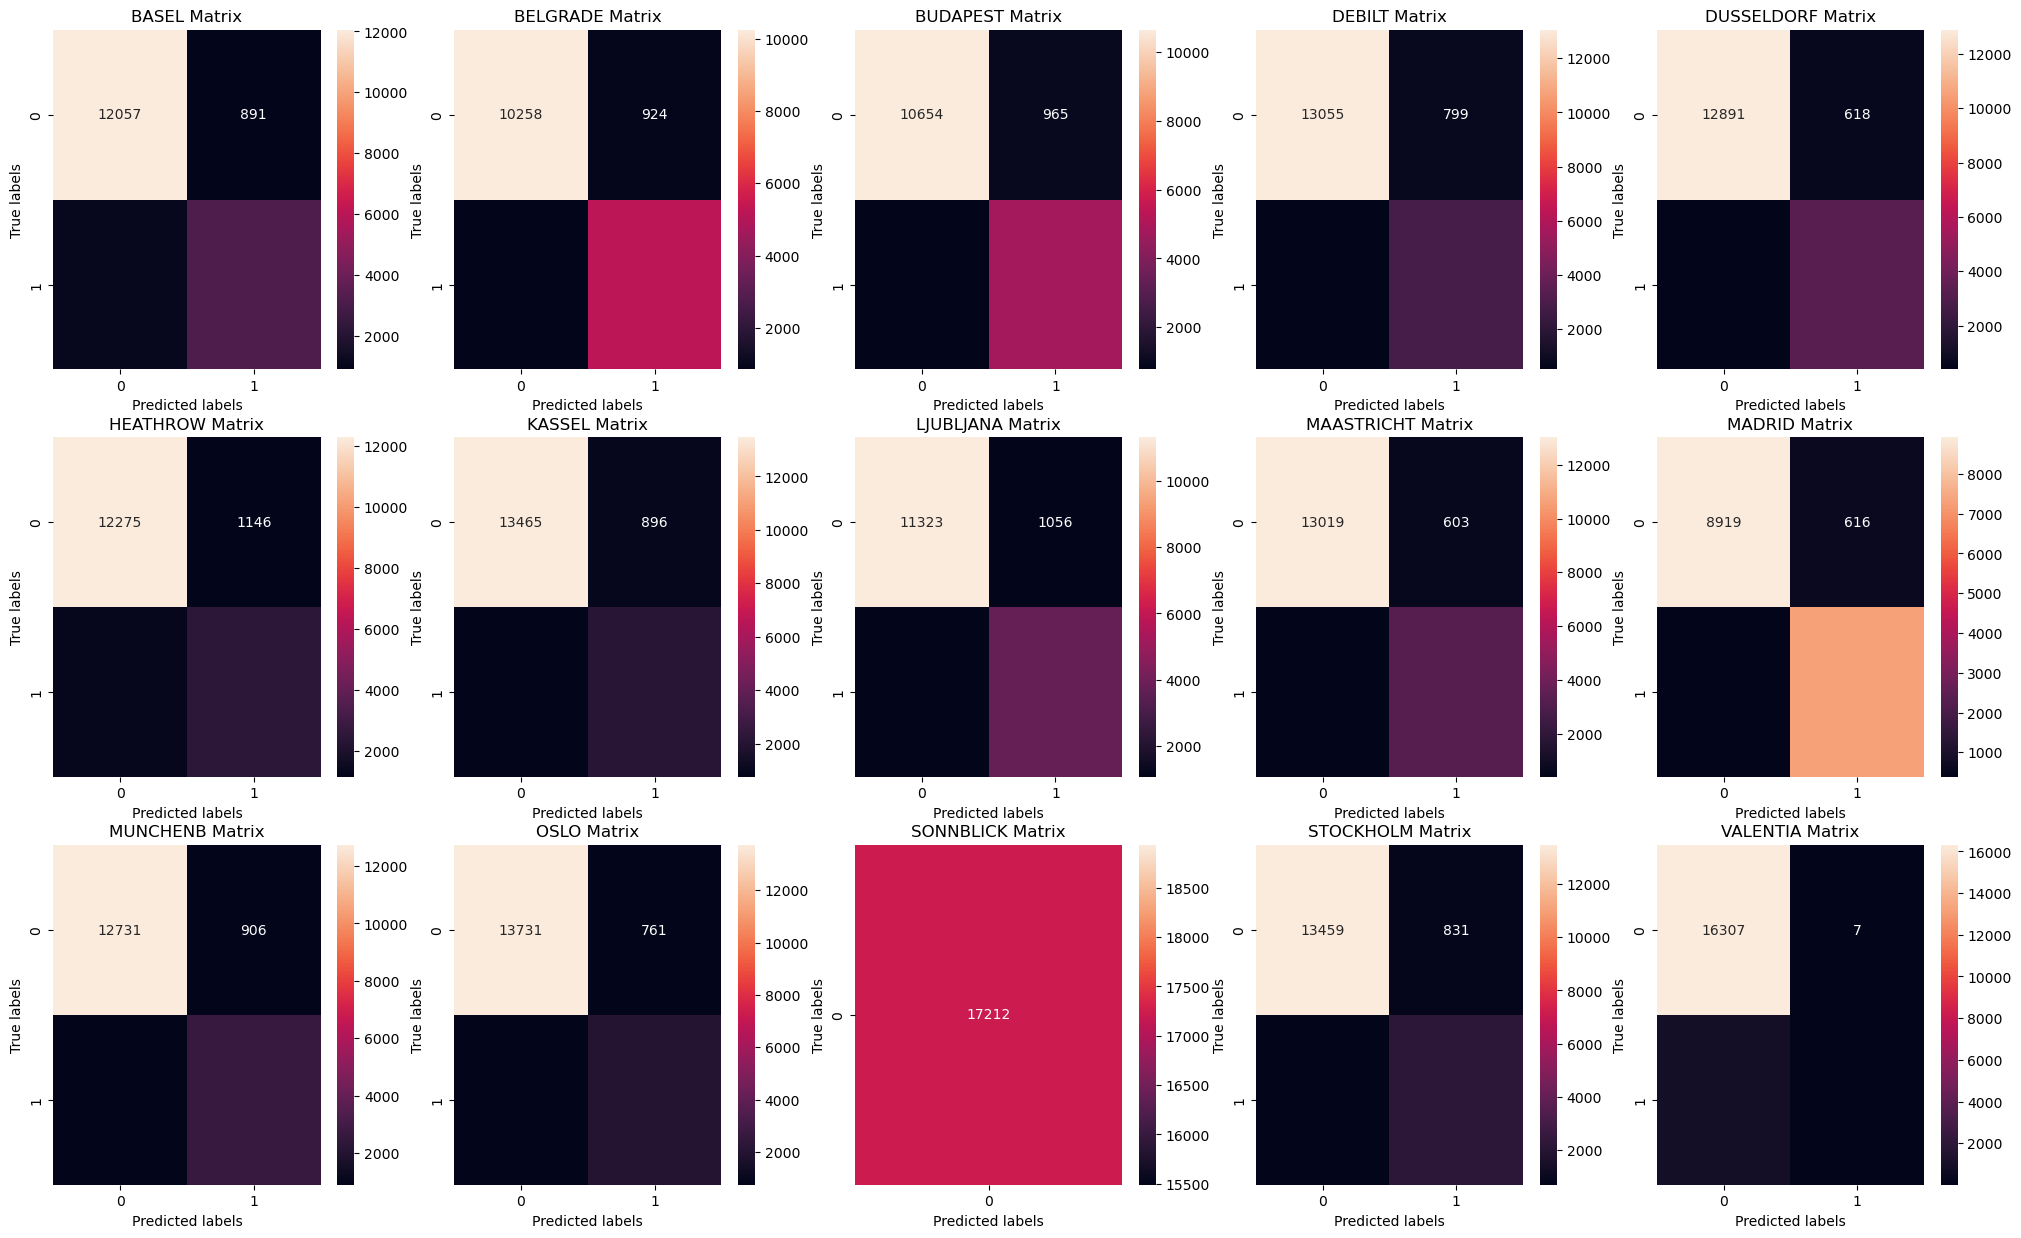

In [43]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train_3.loc[:,name+key], y_pred_3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [44]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_3, y_train_3)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500)

In [45]:
y_pred_3 = mlp.predict(X_train_3)
print(accuracy_score(y_pred_3, y_train_3))
y_pred_test_3 = mlp.predict(X_test_3)
print(accuracy_score(y_pred_test_3, y_test_3))

0.6557634208691611
0.5817357964447543


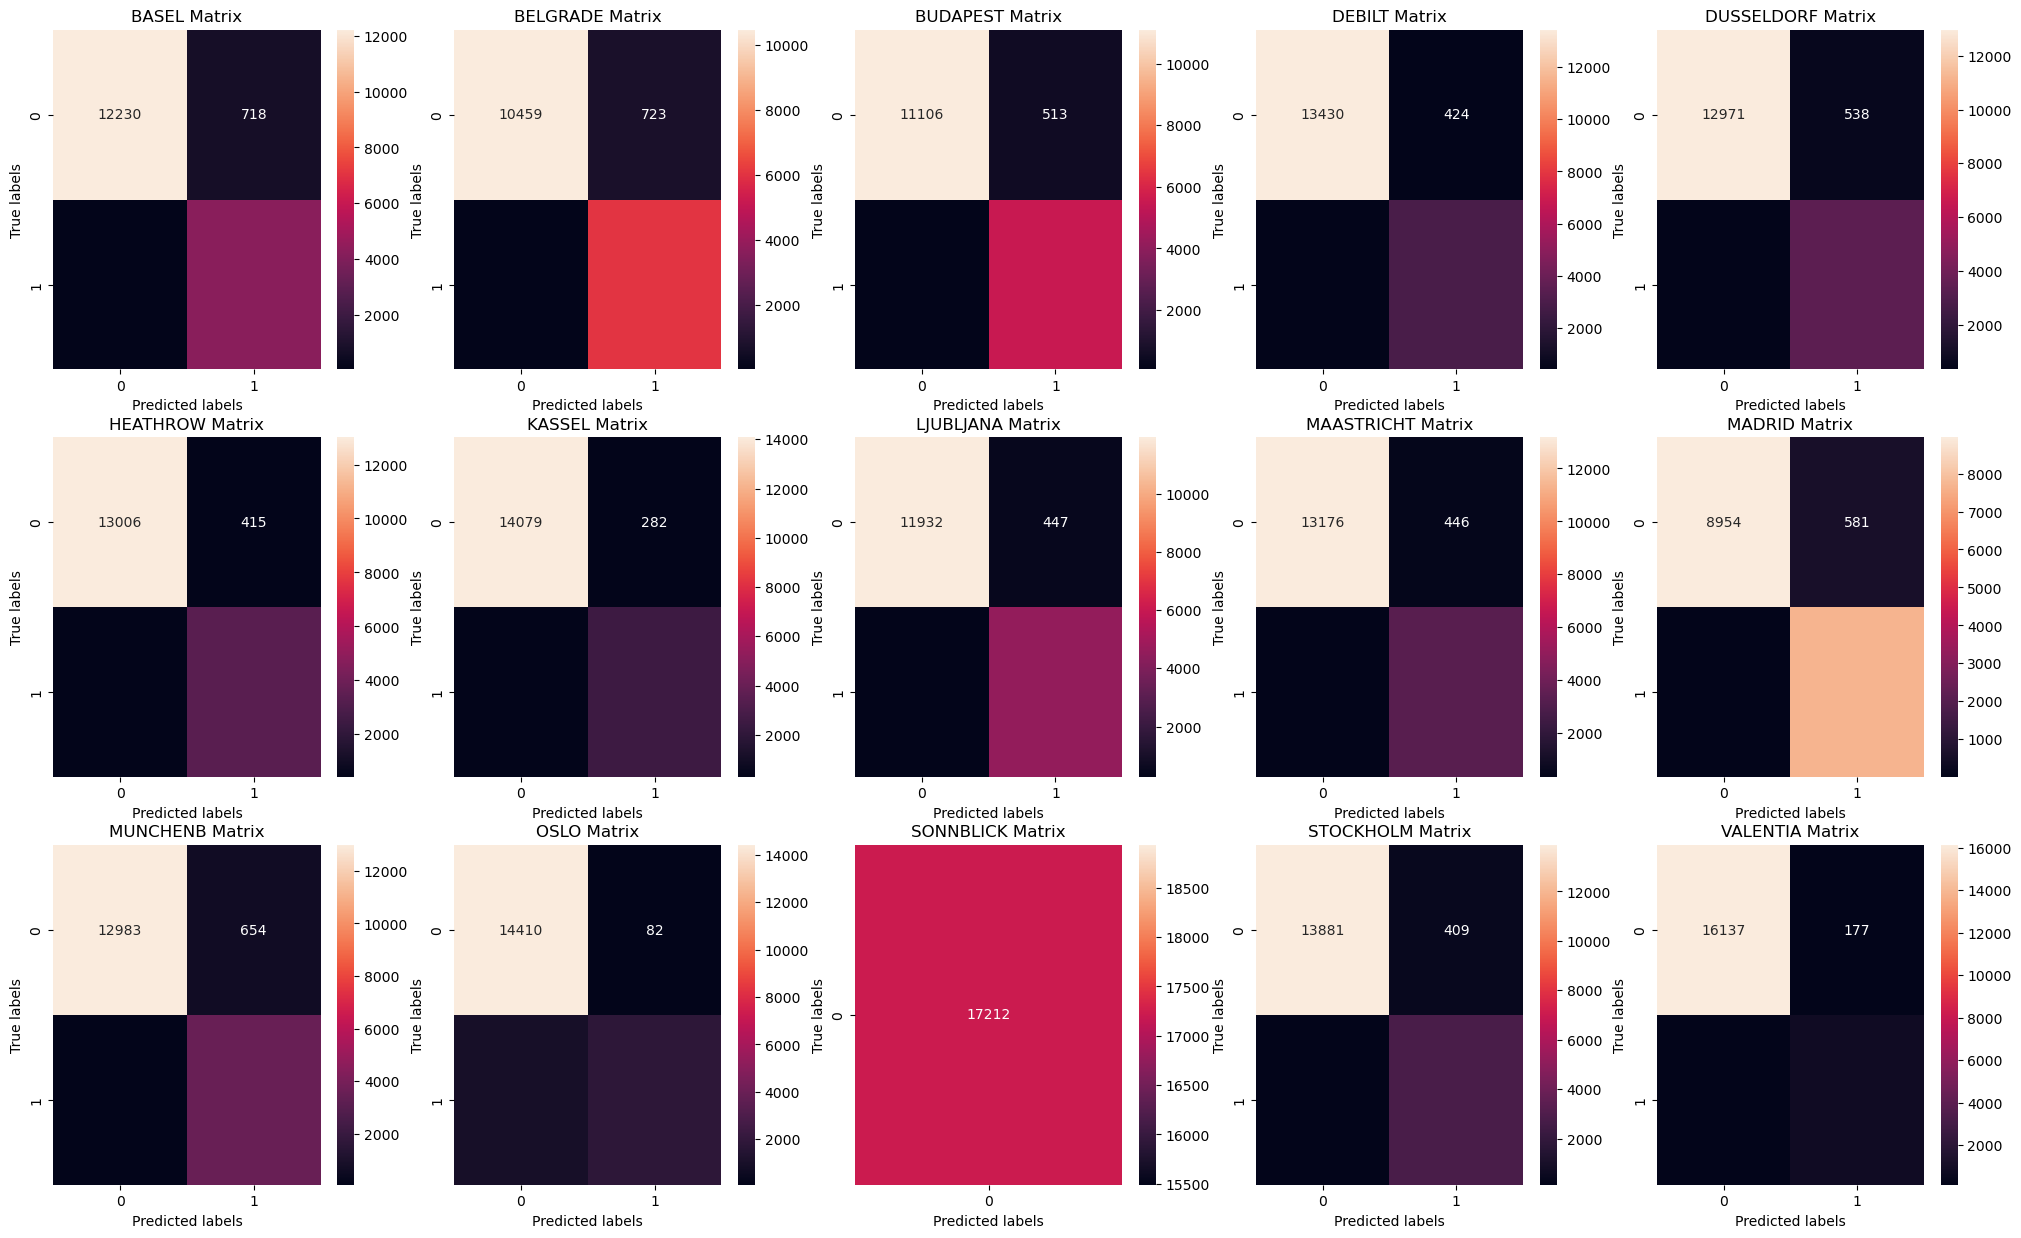

In [46]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train_3.loc[:,name+key], y_pred_3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [47]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_3, y_train_3)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=500)

In [48]:
y_pred_3 = mlp.predict(X_train_3)
print(accuracy_score(y_pred_3, y_train_3))
y_pred_test_3 = mlp.predict(X_test_3)
print(accuracy_score(y_pred_test_3, y_test_3))

0.6700557750406693
0.5477518299058906


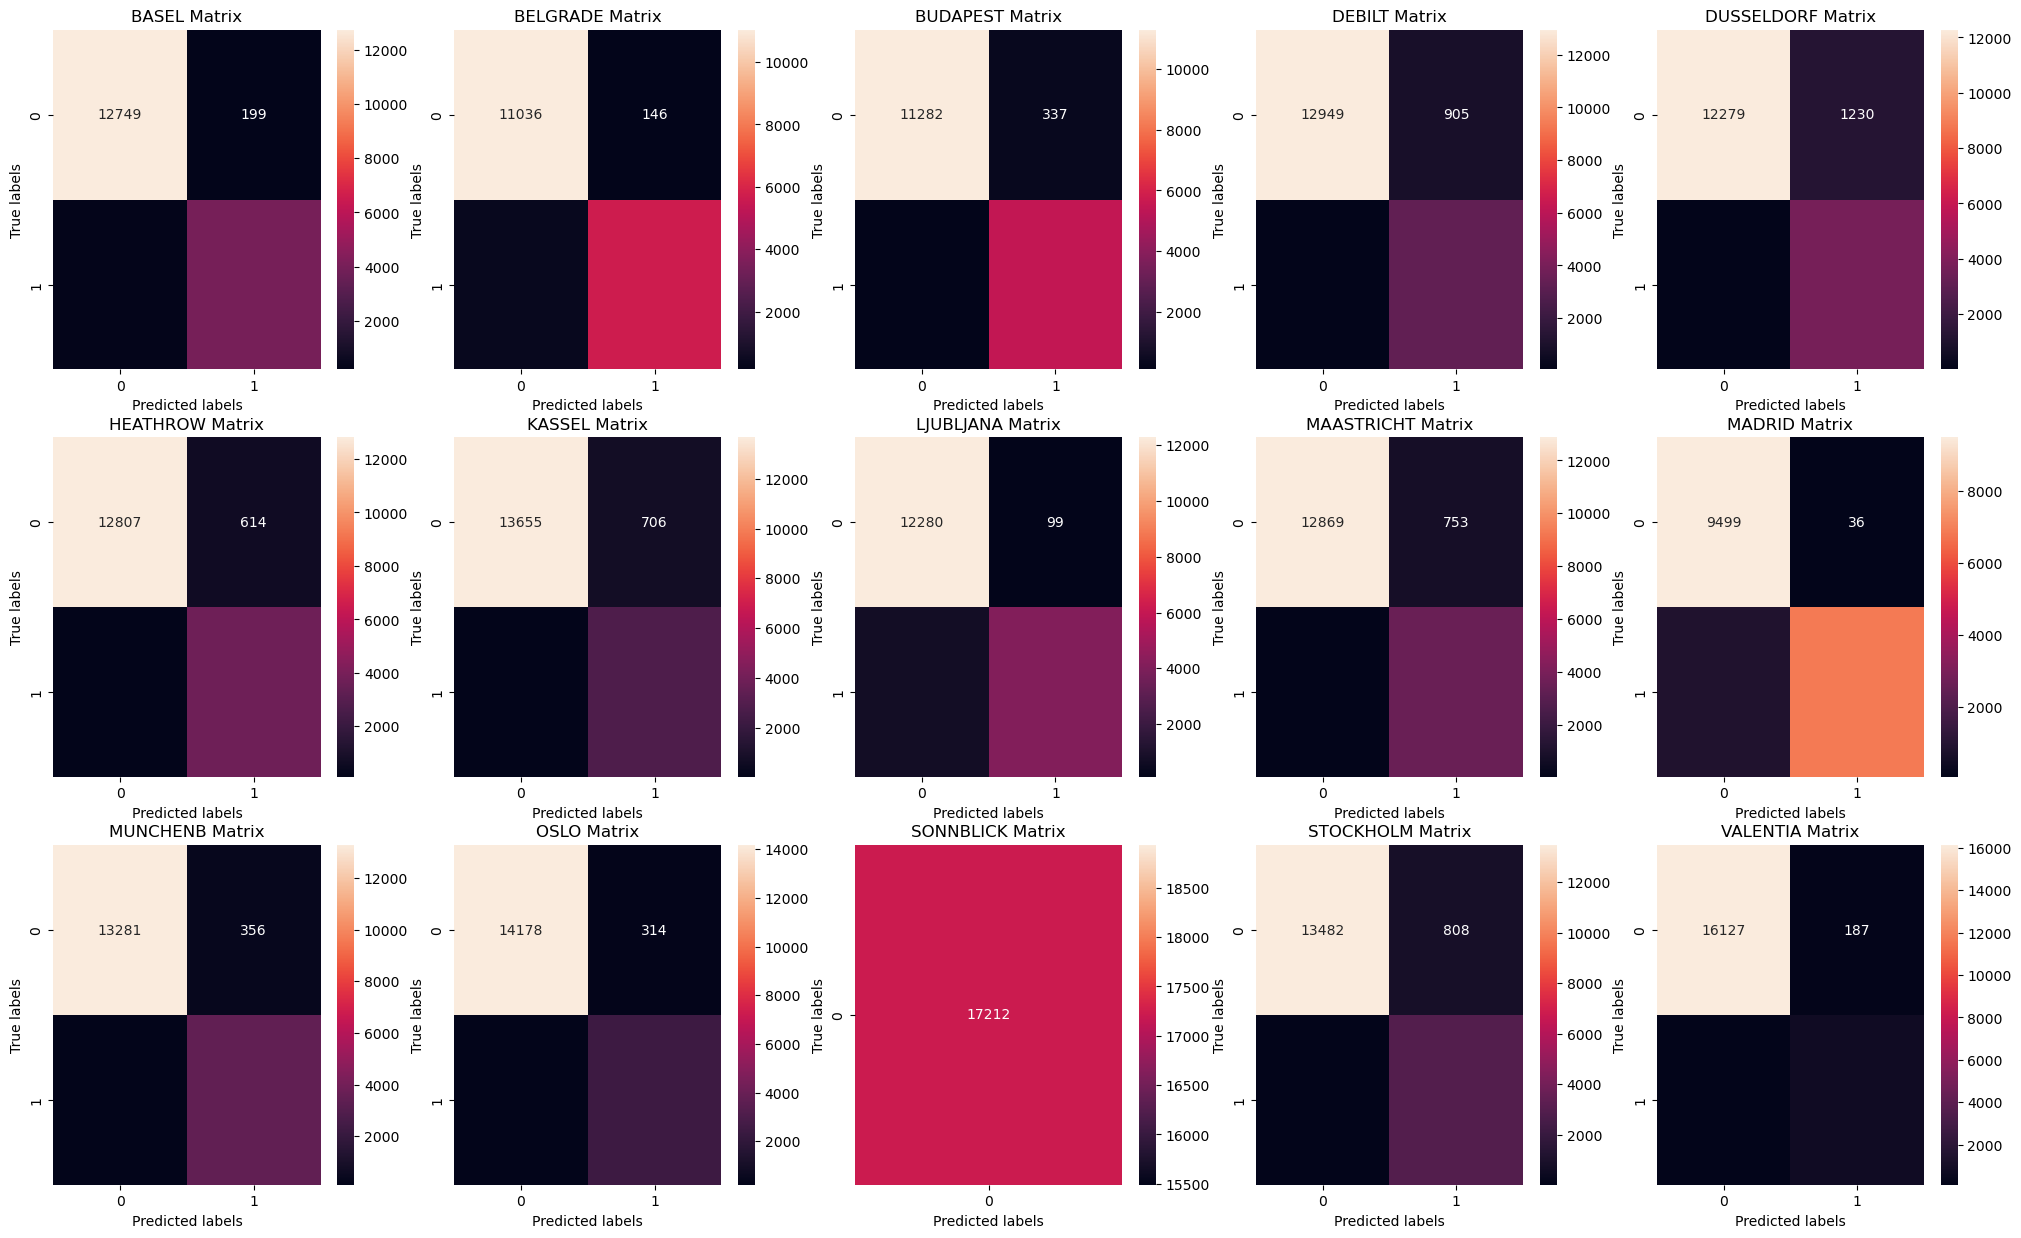

In [49]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train_3.loc[:,name+key], y_pred_3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1